# Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [6]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [8]:
df.shape

(2035, 8)

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
df.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


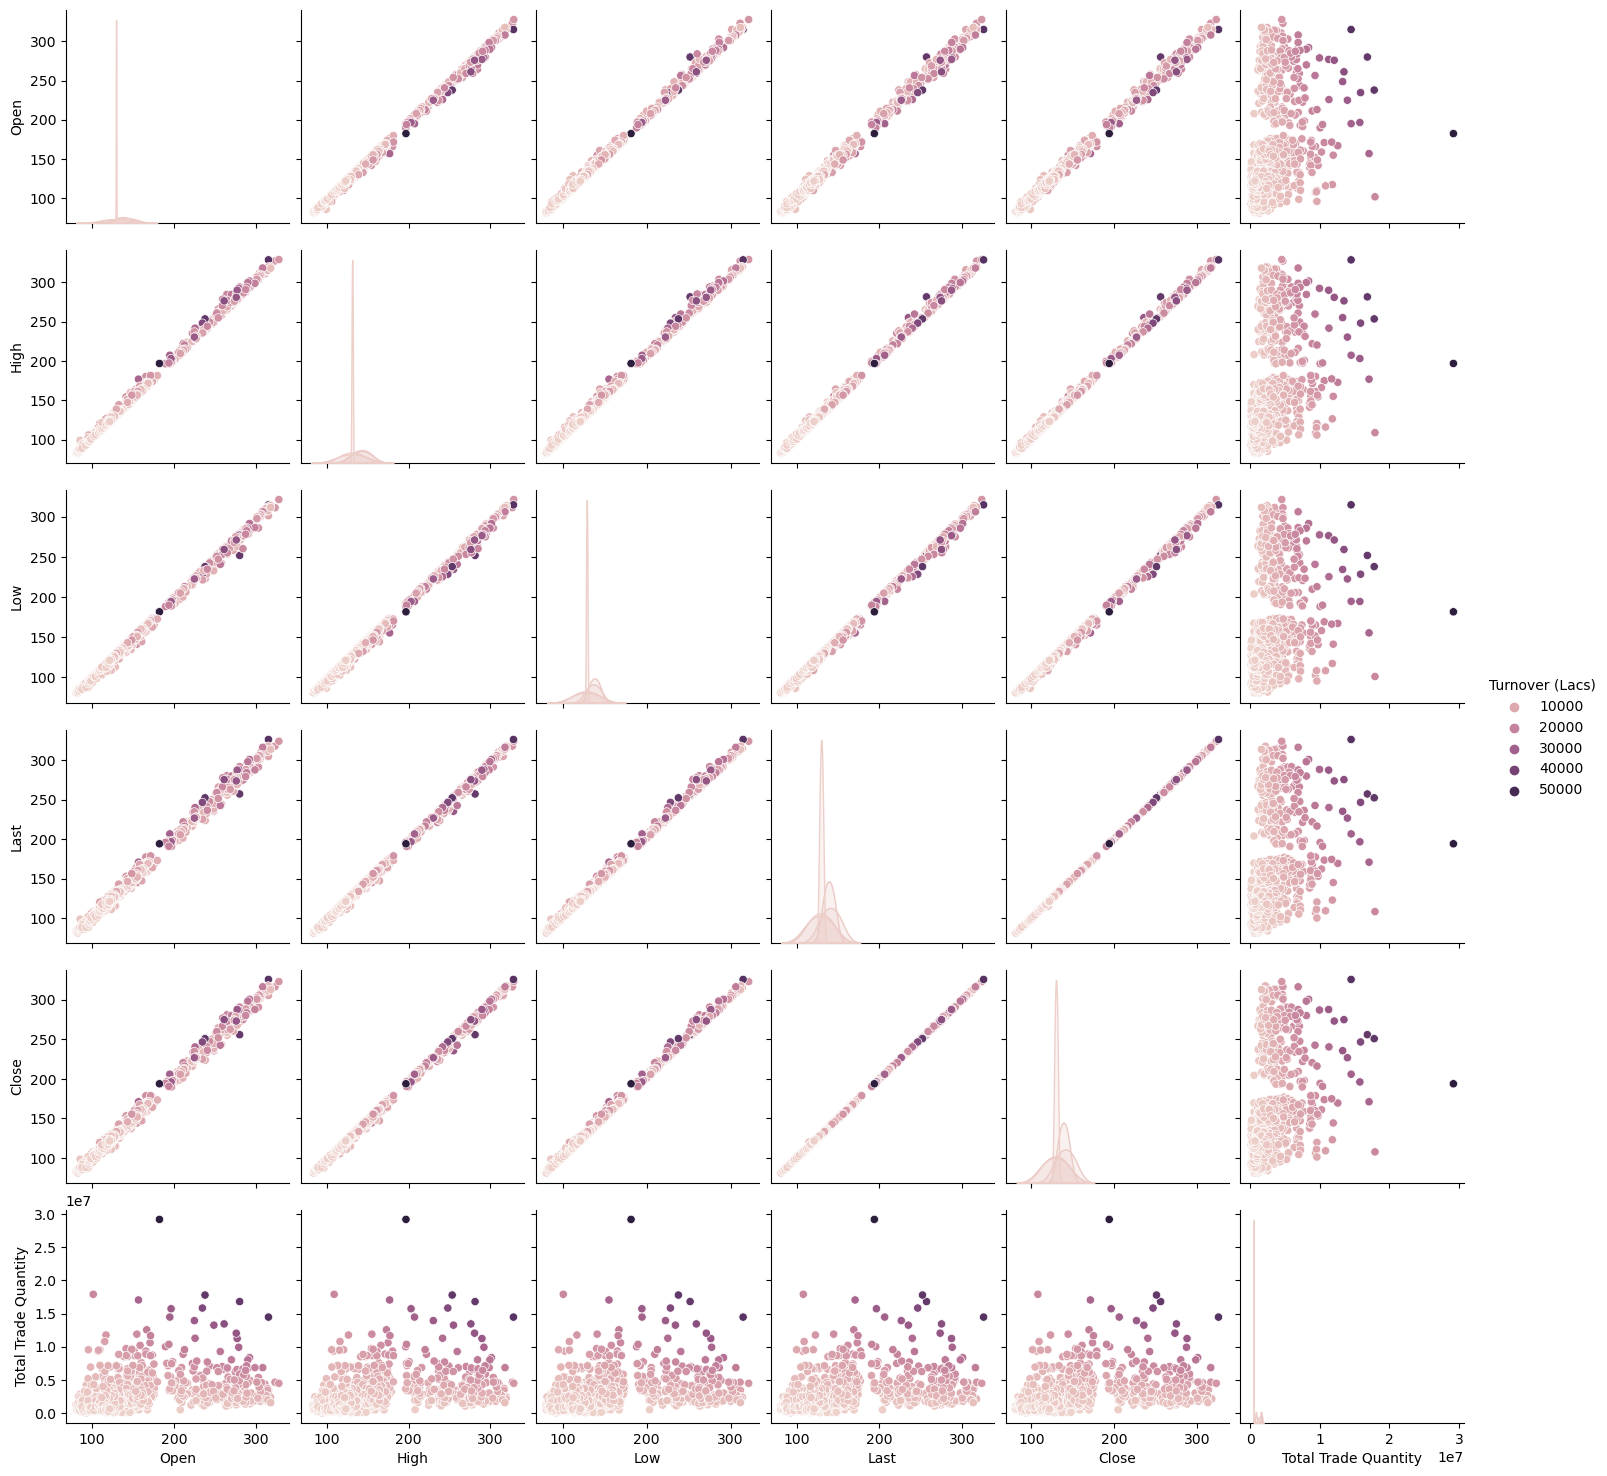

In [14]:
sns.pairplot(df,hue = "Turnover (Lacs)")
plt.show()

In [24]:
close_value = df.reset_index()['Close']
close_value

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

<Figure size 1500x600 with 0 Axes>

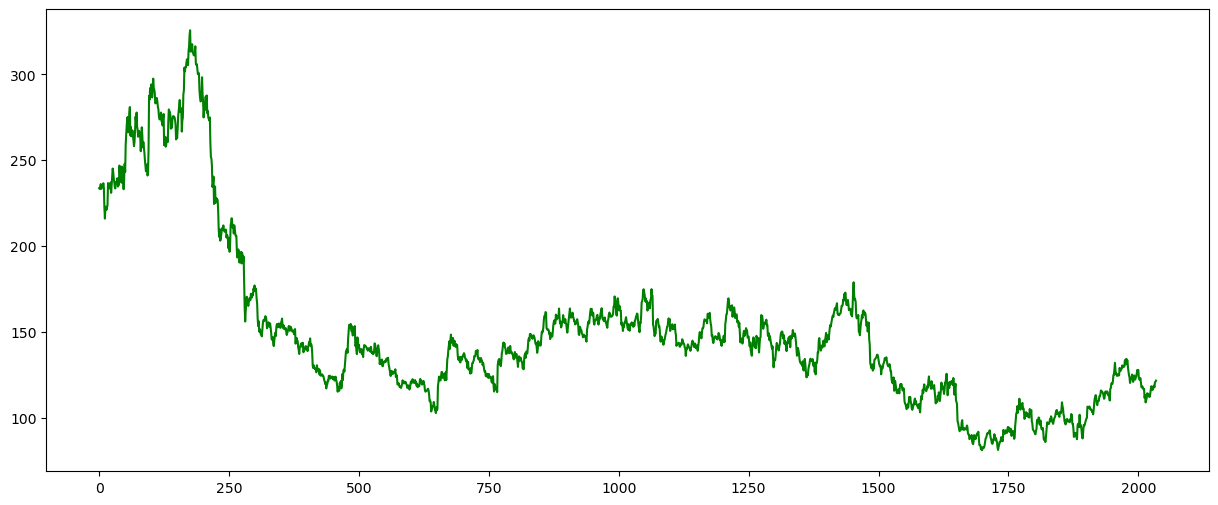

In [26]:
plt.figure(figsize=(15,6))
plt.plot(close_value, c = "g")
plt.show()

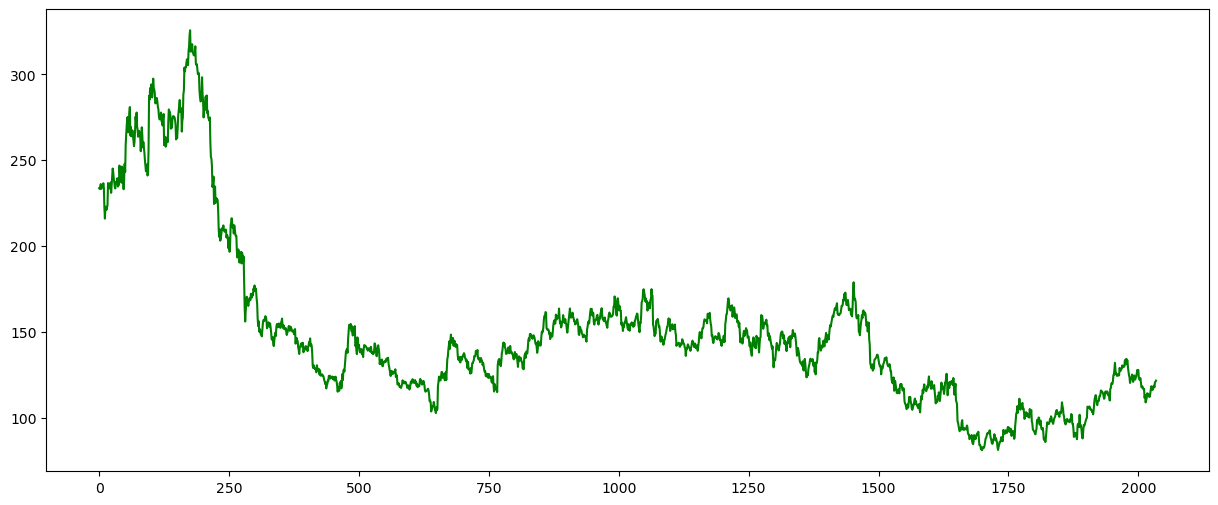

In [27]:
plt.figure(figsize=(15,6))
df_high = df.reset_index()['High']
plt.plot(close_value, c = "g")
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1))
df_high = Scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [30]:
df_high.shape

(2035, 1)

In [31]:
df_high

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

In [33]:
training_size=int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:],df_high[training_size:len(df_high), :1]

In [35]:
training_size, test_size

(1526, 509)

In [45]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [46]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [47]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [52]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [53]:
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [55]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 15s 214ms/step - loss: 0.0267 - val_loss: 0.0068
Epoch 2/100
23/23 [==============================] - 4s 157ms/step - loss: 0.0025 - val_loss: 8.4999e-04
Epoch 3/100
23/23 [==============================] - 4s 167ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 4/100
23/23 [==============================] - 4s 174ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 4s 189ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/100
23/23 [==============================] - 4s 162ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/100
23/23 [==============================] - 4s 165ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/100
23/23 [==============================] - 4s 176ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/100
23/23 [==============================] - 4s 185ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 10/100
23/23 [==============================] - 4s 162ms/step - loss: 9.7108e-04

23/23 [==============================] - 5s 195ms/step - loss: 2.7246e-04 - val_loss: 2.7356e-04
Epoch 77/100
23/23 [==============================] - 4s 175ms/step - loss: 2.1372e-04 - val_loss: 2.4013e-04
Epoch 78/100
23/23 [==============================] - 4s 190ms/step - loss: 2.2115e-04 - val_loss: 2.1286e-04
Epoch 79/100
23/23 [==============================] - 5s 204ms/step - loss: 2.2500e-04 - val_loss: 2.2343e-04
Epoch 80/100
23/23 [==============================] - 4s 179ms/step - loss: 2.2262e-04 - val_loss: 2.0073e-04
Epoch 81/100
23/23 [==============================] - 4s 176ms/step - loss: 2.2358e-04 - val_loss: 2.7420e-04
Epoch 82/100
23/23 [==============================] - 4s 190ms/step - loss: 2.4193e-04 - val_loss: 1.7485e-04
Epoch 83/100
23/23 [==============================] - 5s 207ms/step - loss: 2.6985e-04 - val_loss: 2.0134e-04
Epoch 84/100
23/23 [==============================] - 4s 180ms/step - loss: 2.2984e-04 - val_loss: 2.0986e-04
Epoch 85/100
23/23 [===

In [58]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [60]:
train_predict = Scaler.inverse_transform(train_predict)
test_predict = Scaler.inverse_transform(test_predict)

In [61]:
math.sqrt(mean_squared_error(y_train, train_predict))

166.74954665046036

In [62]:
math.sqrt(mean_squared_error(y_test, test_predict))

109.28846172442924

In [63]:
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

<Figure size 1000x600 with 0 Axes>

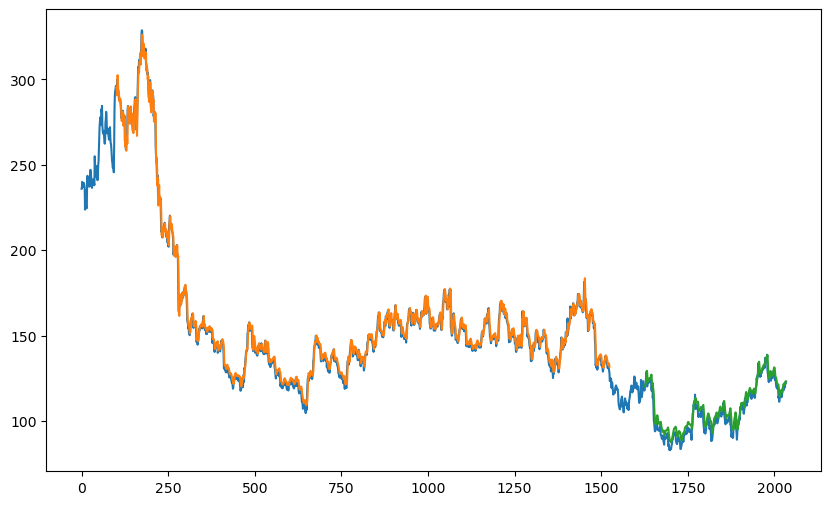

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [65]:
plt.figure(figsize=(10,6))

plt.plot(Scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [66]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [67]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [68]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.1689592]
101
1 day input [0.13254727 0.13397032 0.13356373 0.13498679 0.14108559 0.13498679
 0.12644847 0.12685505 0.12482212 0.14515145 0.1467778  0.15003049
 0.15368977 0.17198618 0.16548079 0.17625534 0.17564546 0.19129904
 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727  0.17483228
 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599
 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665
 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754
 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372
 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426 0.16853019
 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839
 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654
 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037
 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811
 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385
 0.12807481 0.12624517 0.13051433 

8 day output [[0.20307213]]
9 day input [0.12482212 0.14515145 0.1467778  0.15003049 0.15368977 0.17198618
 0.16548079 0.17625534 0.17564546 0.19129904 0.20817239 0.20309006
 0.18479366 0.17930474 0.1896727  0.17483228 0.17849156 0.17645863
 0.18540354 0.18377719 0.19190892 0.18987599 0.19028258 0.19394186
 0.20004066 0.19638138 0.19495832 0.20349665 0.19597479 0.21162838
 0.22036999 0.20979874 0.21528766 0.21589754 0.21610083 0.22748526
 0.19150234 0.1833706  0.17340923 0.16751372 0.1622281  0.17056312
 0.17462899 0.17930474 0.18174426 0.16853019 0.16548079 0.1742224
 0.1713763  0.17300264 0.17157959 0.17767839 0.18459036 0.18702988
 0.18987599 0.19109575 0.18581012 0.17015654 0.16751372 0.16974995
 0.16609067 0.15531612 0.15003049 0.15064037 0.14860744 0.14596463
 0.15043708 0.14413499 0.12441553 0.12827811 0.11547062 0.12034966
 0.13478349 0.13498679 0.12868469 0.13295385 0.12807481 0.12624517
 0.13051433 0.13905265 0.14718439 0.15104696 0.14515145 0.14311852
 0.15816223 0.15328319 

17 day output [[0.23356307]]
18 day input [0.19129904 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727
 0.17483228 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892
 0.18987599 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832
 0.20349665 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766
 0.21589754 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923
 0.16751372 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426
 0.16853019 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959
 0.17767839 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012
 0.17015654 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049
 0.15064037 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553
 0.12827811 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469
 0.13295385 0.12807481 0.12624517 0.13051433 0.13905265 0.14718439
 0.15104696 0.14515145 0.14311852 0.15816223 0.15328319 0.14921732
 0.15531612 0.15917869 0.15938199 0.16344786 0.1689592  0.17310323
 0.17766781 0.1822446

26 day output [[0.2591017]]
27 day input [0.18540354 0.18377719 0.19190892 0.18987599 0.19028258 0.19394186
 0.20004066 0.19638138 0.19495832 0.20349665 0.19597479 0.21162838
 0.22036999 0.20979874 0.21528766 0.21589754 0.21610083 0.22748526
 0.19150234 0.1833706  0.17340923 0.16751372 0.1622281  0.17056312
 0.17462899 0.17930474 0.18174426 0.16853019 0.16548079 0.1742224
 0.1713763  0.17300264 0.17157959 0.17767839 0.18459036 0.18702988
 0.18987599 0.19109575 0.18581012 0.17015654 0.16751372 0.16974995
 0.16609067 0.15531612 0.15003049 0.15064037 0.14860744 0.14596463
 0.15043708 0.14413499 0.12441553 0.12827811 0.11547062 0.12034966
 0.13478349 0.13498679 0.12868469 0.13295385 0.12807481 0.12624517
 0.13051433 0.13905265 0.14718439 0.15104696 0.14515145 0.14311852
 0.15816223 0.15328319 0.14921732 0.15531612 0.15917869 0.15938199
 0.16344786 0.1689592  0.17310323 0.17766781 0.18224461 0.18670832
 0.19102523 0.19518805 0.19920027 0.20307213 0.20681697 0.21044886
 0.21398075 0.21742384

In [69]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [70]:
day_new.shape

(100,)

In [71]:
day_pred.shape

(28,)

In [72]:
ds3 = df_high.tolist()
ds3.extend(lst_output)

len(df_high)

2035

<Figure size 1300x600 with 0 Axes>

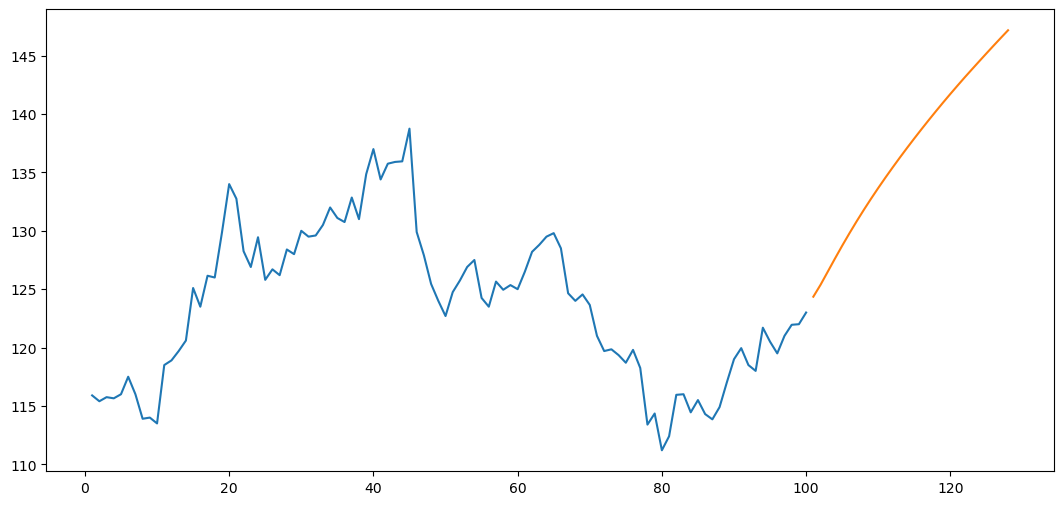

In [74]:
plt.figure(figsize=(13,6))

plt.plot(day_new, Scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred, Scaler.inverse_transform(lst_output))

plt.show()

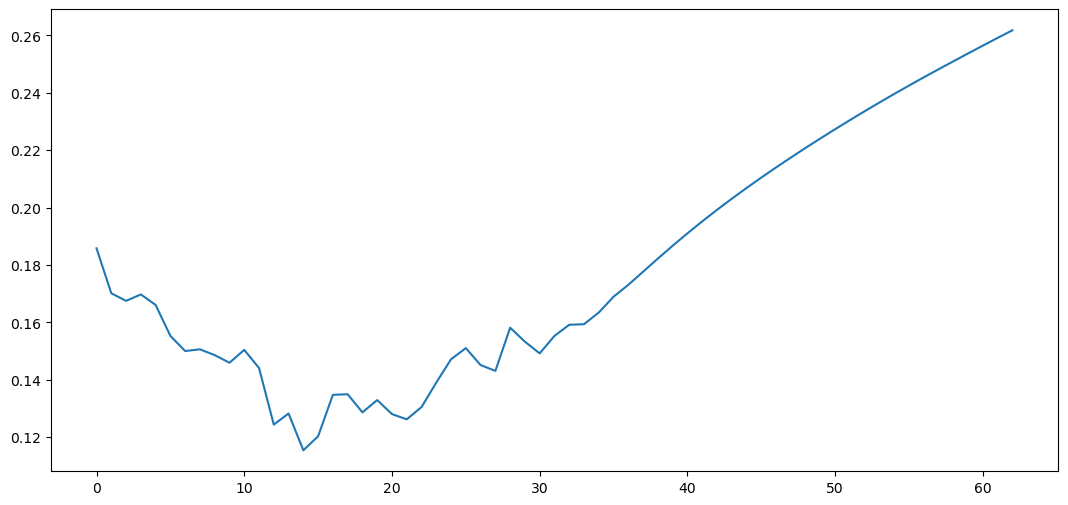

In [75]:
plt.figure(figsize=(13,6))

ds3=df_high.tolist()
ds3.extend(lst_output)
plt.plot(ds3[2000:])
plt.show()

<Figure size 1300x600 with 0 Axes>

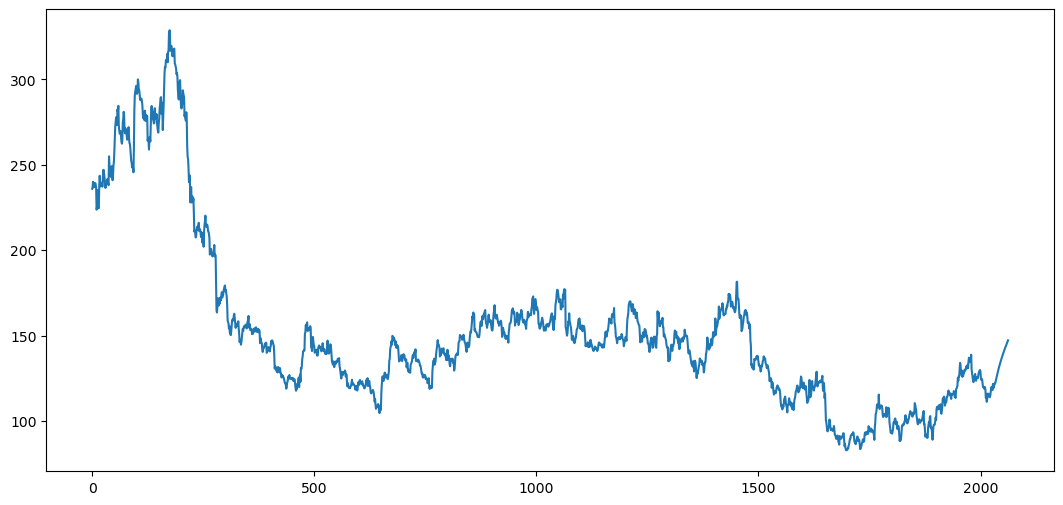

In [77]:
plt.figure(figsize=(13,6))

ds3=Scaler.inverse_transform(ds3).tolist()
plt.plot(ds3)

plt.show()